Wordcloud and masks
================

Using a mask you can generate wordclouds in arbitrary shapes.



In [1]:
%matplotlib inline

In [12]:
# from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import requests
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [3]:
#text after exporting a whatsapp chat as a .txt file. Took away the date and name column in excel
words = open('C:/Users/noah/Downloads\WhatsApp Chat with Ugly Rat.txt', errors= 'ignore')
words = words.read()
words = words.lower()

In [4]:
#adding additional words to the STOPWORDS set
x = ['oi','hai','kya','mai','ye','na','re','ok','punch','pe','aa','iku','ason','ke','rke','pu','da','te','tu','li','ar','stt',
     'tho','hmm','bhi','ay','ka','ko','ki','vo','lo','se','gh','ta','at','bo','rra','bl','ti','ri','th','wh','ut']
for i in x:
    STOPWORDS.add(i)
    
# And the words includes a lot of hindi words since it is a real chat

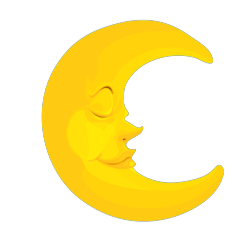

In [5]:
#the mask we are using
mask = np.array(Image.open(requests.get('https://pngimg.com/uploads/moon/moon_PNG23.png', stream=True).raw))
plt.figure()
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

In [6]:
wc = WordCloud(width=4000,height=1800,background_color="white",mask= mask, max_words=2000,stopwords=STOPWORDS)

wc.generate(words)

# wc.to_file("chatt.png")

(-0.5, 3430.5, 3844.5, -0.5)

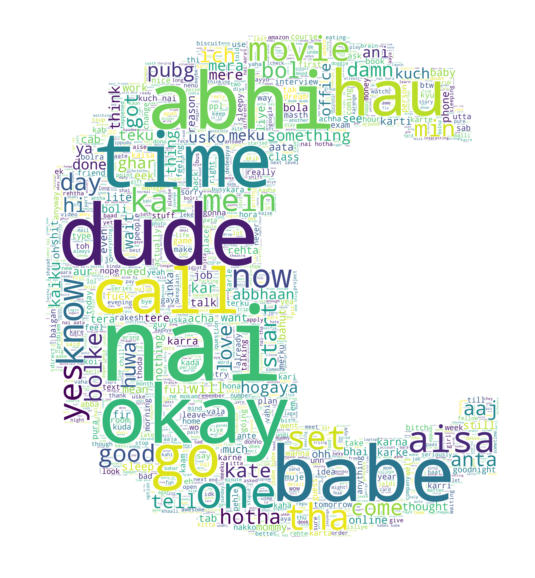

In [31]:
plt.figure(figsize=(20,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

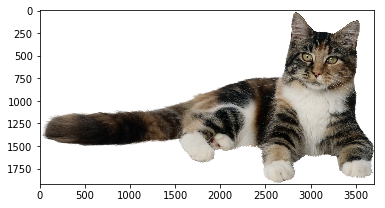

In [8]:
mask2 = np.array(Image.open(requests.get('https://pngimg.com/uploads/cat/cat_PNG50435.png', stream=True).raw))
plt.imshow(mask2)

In [42]:
wc2 = WordCloud(height =1950,width= 3800, repeat= False, color_func= mask2.all(), background_color="pink",
                max_font_size=120,mask= mask2, max_words=2000,stopwords=STOPWORDS)

wc2 = wc2.generate(words)

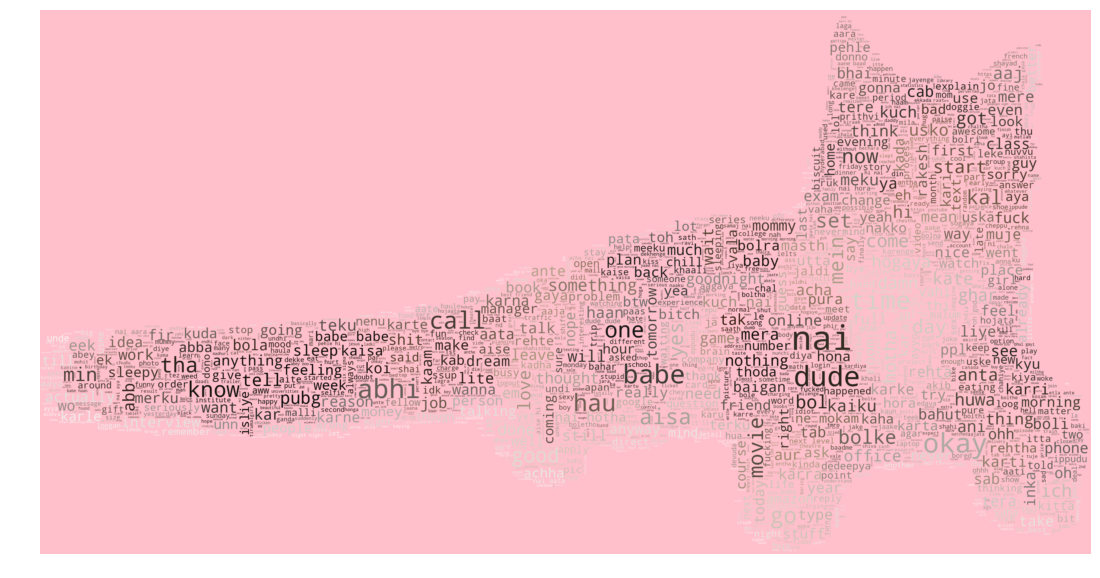

In [43]:
plt.figure(figsize=(20,10))
image_colors = ImageColorGenerator(mask2)
plt.imshow(wc2.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis('off')
plt.savefig('word_cat_pink',pad_inches = 0,bbox_inches = 'tight',transparent = True)